# Cell 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 1. Load Data

In [2]:
file_path = "../data/raw/complaints.csv" 
print(f"Loading data from {file_path}...")
df = pd.read_csv(file_path, low_memory=False)

print(f"Initial shape: {df.shape}")

Loading data from ../data/raw/complaints.csv...
Initial shape: (9609797, 18)


# 2. Filter for Specific Products

## CFPB product names change over time. We filter for keywords to catch all variations.

In [3]:
target_products = [
    "Credit card",
    "Personal loan",
    "Savings account",
    "Money transfer", 
    "Money transfers" # Handling variations
]

# Function to check if target is in product name

In [4]:
def is_target_product(product_name):
    if pd.isna(product_name): return False
    return any(target in product_name for target in target_products)

df_filtered = df[df['Product'].apply(is_target_product)].copy()

# Standardize Product Names for cleaner analysis

In [5]:
def standardize_product(name):
    if "Credit card" in name: return "Credit Card"
    if "Personal loan" in name: return "Personal Loan"
    if "Savings" in name: return "Savings Account"
    if "Money" in name: return "Money Transfers"
    return name

df_filtered['Product_Category'] = df_filtered['Product'].apply(standardize_product)

print(f"Shape after product filtering: {df_filtered.shape}")

Shape after product filtering: (583475, 19)


# 3. Filter for Narratives

## We only want rows where the customer wrote a text complaint

In [6]:
df_clean = df_filtered.dropna(subset=['Consumer complaint narrative']).copy()

print(f"Shape after removing empty narratives: {df_clean.shape}")

Shape after removing empty narratives: (288019, 19)


# 4. Text Cleaning

In [10]:
import re

def clean_text(text):
    if not isinstance(text, str): return ""
    # Lowercase
    text = text.lower()
    # Remove XXXX (CFPB redactions)
    text = re.sub(r'x{2,}', '', text)
    # Remove special characters but keep punctuation useful for sentence splitting
    text = re.sub(r'[^a-z0-9\s.,?!]', '', text)
    # Remove extra whitespace
    text = " ".join(text.split())
    return text

df_clean['cleaned_narrative'] = df_clean['Consumer complaint narrative'].apply(clean_text)

# 5. Analysis

## Narrative Length

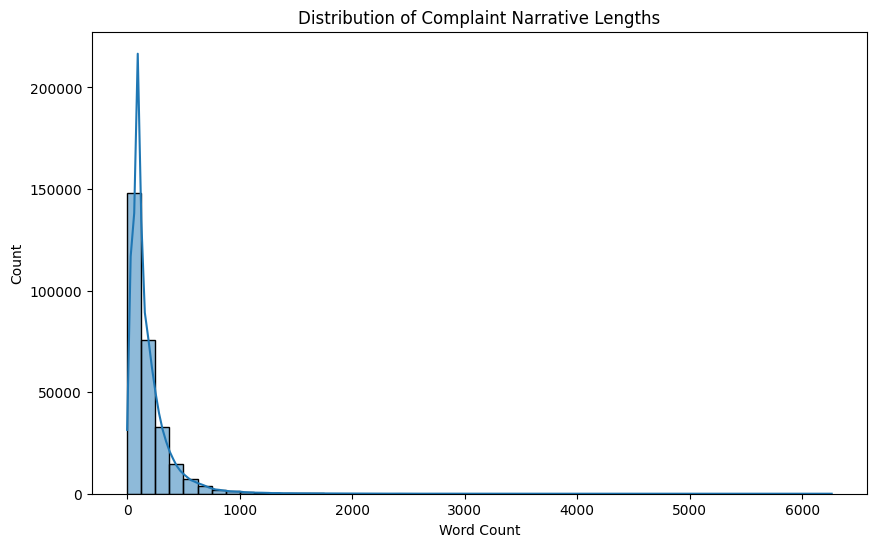

In [11]:
df_clean['word_count'] = df_clean['cleaned_narrative'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(df_clean['word_count'], bins=50, kde=True)
plt.title("Distribution of Complaint Narrative Lengths")
plt.xlabel("Word Count")
plt.show()

## Product Distribution

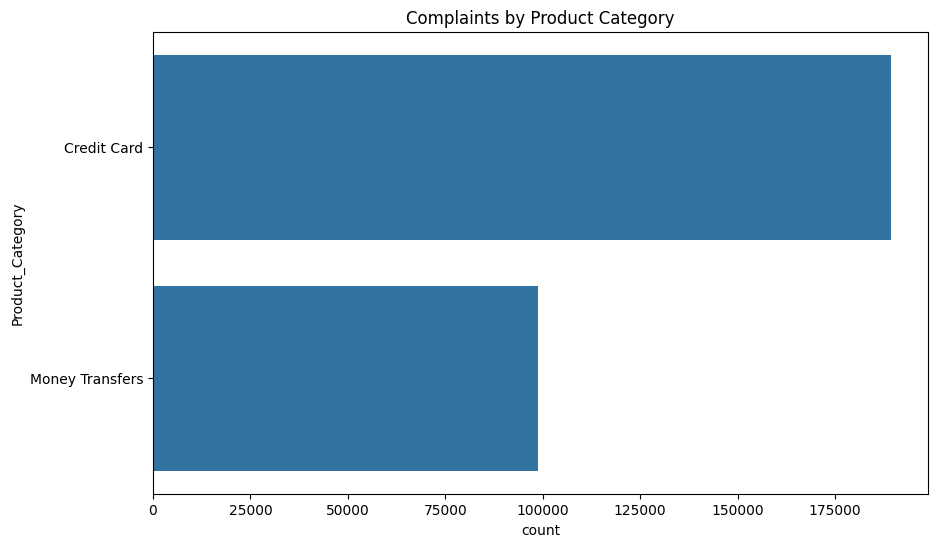

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Product_Category', data=df_clean, order=df_clean['Product_Category'].value_counts().index)
plt.title("Complaints by Product Category")
plt.show()

## 6. Save Processed Data

In [13]:
output_path = "../data/processed/filtered_complaints.csv"
df_clean.to_csv(output_path, index=False)
print(f"Saved processed data to {output_path}")

Saved processed data to ../data/processed/filtered_complaints.csv
